Fashion MNIST 분류 예제를 만들어봅시다. 

Fully Connected Layer로 모델을 만들어 봅시다. 

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

pytorch에서 제공하는 데이터셋을 활용해서 진행해보겠습니다.

1. 라이브러리 불러오기

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

2. 데이터 불러오기

- DataLoader를 통해서 데이터를 불러옵니다
- Train과 Test 데이터셋을 분리해서 가져옵니다. 

https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html

In [2]:
# Train dataset
training_data = datasets.FashionMNIST(
    root="data",    # 저장할 위치
    train=True,     # 훈련 데이터셋
    download=True,  # 다운로드 실행
    transform=ToTensor(),   # 변환할 함수
)

# Test Dataset
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



파일 창을 살펴보면 data 폴더가 생성되고, 데이터가 저장된 것을 확인할 수 있습니다. 


데이터셋을 살펴봅시다

In [3]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

In [4]:
dir(training_data)

['__add__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_is_protocol',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

첫번째 데이터셋을 살펴봅시다. 

이미지와 라벨이 함께 Tuple로 묶여있습니다 .

In [ ]:
training_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

이미지를 출력해봅시다. 


In [6]:
training_data[0][0].shape  # 이미지는 컬러채널이 1입니다. matplotlib에서는 회색조는 컬러채널을 없애줘야 합니다. 

torch.Size([1, 28, 28])

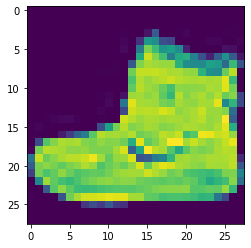

In [10]:
import matplotlib.pyplot as plt
plt.imshow(training_data[0][0].squeeze(), cmap='color')

해당하는 라벨은 9입니다. 

In [11]:
training_data[0][1]

9

데이터셋에 클래스 정보를 확인할 수 있습니다. 

In [12]:
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [13]:
training_data.class_to_idx  # 9번은 앵클 부츠입니다 .

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

pytorch 데이터셋은 DataLoader를 사용하여 batch단위로 학습할 수 있습니다. 

In [14]:
batch_size = 64

# 데이터 로더 만들기
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)


In [15]:
type(train_dataloader)

torch.utils.data.dataloader.DataLoader

In [16]:
dir(train_dataloader)

['_DataLoader__initialized',
 '_DataLoader__multiprocessing_context',
 '_IterableDataset_len_called',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_collation',
 '_dataset_kind',
 '_get_iterator',
 '_index_sampler',
 '_is_protocol',
 '_iterator',
 'batch_sampler',
 'batch_size',
 'check_worker_number_rationality',
 'collate_fn',
 'dataset',
 'drop_last',
 'generator',
 'multiprocessing_context',
 'num_workers',
 'persistent_workers',
 'pin_memory',
 'pin_memory_device',
 'prefetch_factor',
 'sampler',
 'timeout',
 'worker_init_fn']

In [17]:
# 데이터로더는 반복문에서 batch 단위로 데이터를 넘깁니다. 
# Fashion Mnist 데이터셋은 이미지, 라벨 형태로 데이터가 넘어갑니다

for X, y in train_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break  # 한번만 출력하기 위해서 추가

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


모델을 만들어 봅시다

In [18]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()  # 이미지를 1차원으로 변경
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        return x

In [19]:
model = NeuralNetwork()

gpu 사용을 해봅시다. 


In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"  # gpu 사용 가능 여부 확인, 없으면 cpu로 사용
print(device)

cuda


In [21]:
model = model.to(device)  

In [22]:
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

모델의 파라미터 수 등을 살펴봅시다. 
torchsummary 라이브러리를 사용해보겠습니다

In [24]:
from torchsummary import summary
summary(model,input_size = (1,28,28) )   # 총 66만개가 넘는 파라미터가 생성되었습니다. 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
              ReLU-3                  [-1, 512]               0
            Linear-4                  [-1, 512]         262,656
              ReLU-5                  [-1, 512]               0
            Linear-6                   [-1, 10]           5,130
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.55
Estimated Total Size (MB): 2.58
----------------------------------------------------------------


loss fuction과 optimaze 지정


In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

재사용을 위해 학습코드를 함수로 만듭니다

In [26]:
def train(dataloader, model, loss_fn, optimizer):  # 모델이나, loss_fn 등을 바꿔도 사용할 수 있도록 입력값으로 처리리
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader): # enumerate은 인덱스 숫자 추가가
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

테스트 코드도 만들어 보겠습니다. 

이때는 레이어의 학습이 불필요하기 때문에 약간의 수정이 필요합니다

* model.eval(): 추론 모드로 변경하여 Dropout, BatchNorm 등 레이어에 랜덤요소 있는 부분 영향 없도록 함
* torch.no_grad(): 그래디언트 계산 안 함, 성능 향상

In [27]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():  
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

훈련과 평가를 동시에 해봅시다

In [ ]:
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.313272  [   64/60000]
loss: 2.295096  [ 6464/60000]
loss: 2.274530  [12864/60000]
loss: 2.268411  [19264/60000]
loss: 2.251139  [25664/60000]
loss: 2.224458  [32064/60000]
loss: 2.235108  [38464/60000]
loss: 2.198635  [44864/60000]
loss: 2.205962  [51264/60000]
loss: 2.168600  [57664/60000]
Test Error: 
 Accuracy: 37.2%, Avg loss: 2.163090 

Epoch 2
-------------------------------
loss: 2.171561  [   64/60000]
loss: 2.165154  [ 6464/60000]
loss: 2.104589  [12864/60000]
loss: 2.126954  [19264/60000]
loss: 2.074500  [25664/60000]
loss: 2.015399  [32064/60000]
loss: 2.045001  [38464/60000]
loss: 1.960624  [44864/60000]
loss: 1.977458  [51264/60000]
loss: 1.910777  [57664/60000]
Test Error: 
 Accuracy: 55.5%, Avg loss: 1.902802 

Epoch 3
-------------------------------
loss: 1.925410  [   64/60000]
loss: 1.905745  [ 6464/60000]
loss: 1.783865  [12864/60000]
loss: 1.836717  [19264/60000]
loss: 1.726412  [25664/60000]
loss: 1.675166  [32064/600